In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

# Import dataset
Download the handwritten digits dataset from sklearn.
These are composed of 70000 28x28 pixel gray-scale images of handwritten digits divided into 60000 training set and 10000 test set.

In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, parser='auto')
y = y.astype(int)
X = X / 255

# transform y to DataFrame with only one column
y = y.to_frame()

print("Number of rows in the data:", X.shape[0])
print("Number of columns in the data:", X.shape[1])

Number of rows in the data: 70000
Number of columns in the data: 784


This will result in 784-dimensional feature vectors (28*28) of values between 0 (white) and 1 (black).
## Split the dataset into training and test set
Split again using stratify to ensure that the distribution of the labels in the training and test set is the same.

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=10000, random_state=42, stratify=y)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((60000, 784), (10000, 784), (60000, 1), (10000, 1))

# Visualize the data
In X_train, each row is a 784-dimensional feature vector. We need to reshape it to a 28x28 image in order to visualize it.

In [4]:
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
41086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Using describe() we can see that the values range from 0 to 1

In [5]:
X_train.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.0,60000.0,60000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000777,0.000381,0.000173,0.000063,0.000058,0.000008,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.023413,0.016601,0.010468,0.005961,0.006572,0.001359,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.996078,0.996078,0.992157,0.992157,0.996078,0.243137,0.0,0.0,0.0,0.0


In [6]:
Y_train.head()

,class
41086,6
38747,9
66359,8
25244,1
26820,0


Plot the distribution of the labels in the training set compared to the original dataset

<Axes: xlabel='class'>

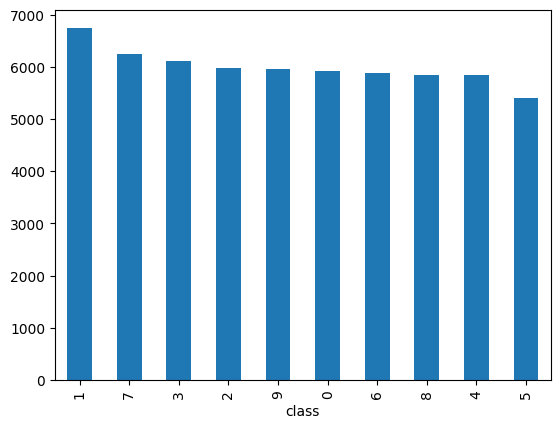

In [7]:
Y_train['class'].value_counts().plot(kind='bar')

<Axes: xlabel='class'>

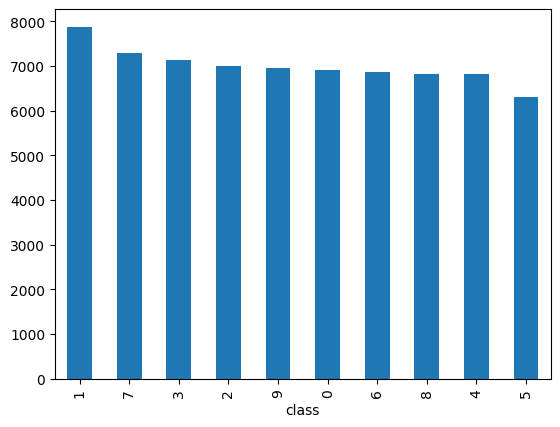

In [8]:
y['class'].value_counts().plot(kind='bar')

Plot some of the images in the training set

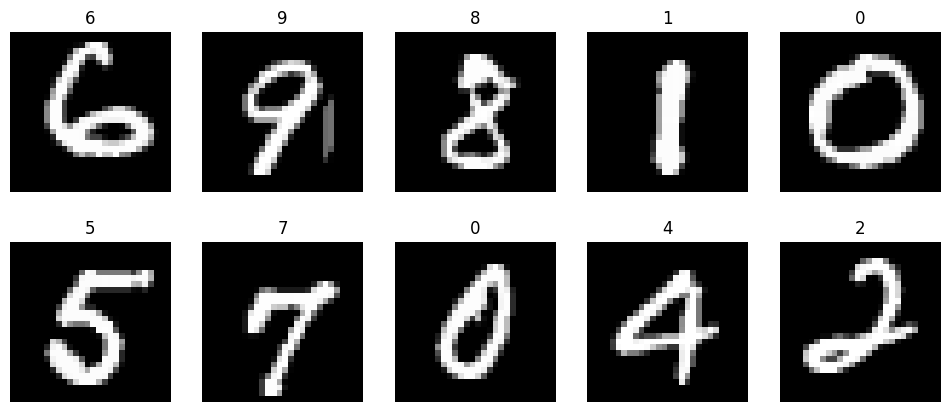

In [9]:
fig, ax = plt.subplots(2, 5, figsize=(12, 5))
for i in range(10):
    ax[i // 5, i % 5].imshow(np.array(X_train.iloc[i]).reshape(28, 28), cmap='gray')
    ax[i // 5, i % 5].set_title(Y_train.iloc[i]['class'])
    ax[i // 5, i % 5].axis('off')

plt.show()

# Reduce the size of the dataset for faster parameter tuning
Split again reducing the size of the training set to 20000 and the test set to 6000 using stratify to ensure that the distribution of the labels in the training and test set is the same.

In [10]:
X_train_small, X_test_small, Y_train_small, Y_test_small = train_test_split(X_train, Y_train, train_size=20000, test_size=6000,
                                                                            random_state=42, stratify=Y_train)
X_train_small.shape, X_test_small.shape, Y_train_small.shape, Y_test_small.shape

((20000, 784), (6000, 784), (20000, 1), (6000, 1))

<Axes: xlabel='class'>

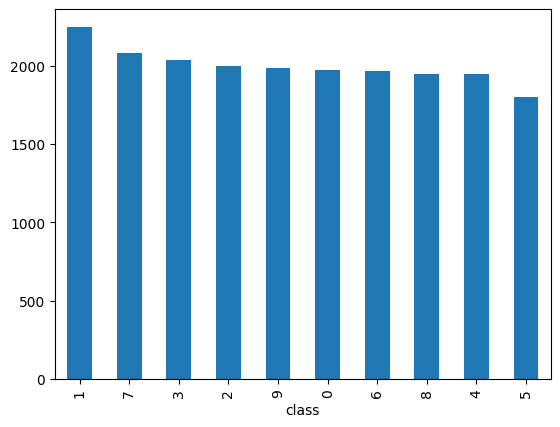

In [11]:
Y_train_small['class'].value_counts().plot(kind='bar')

## Save the data to CSV

In [12]:
X_train.to_csv('./data/X_train.csv', index=False)
X_test.to_csv('./data/X_test.csv', index=False)
Y_train.to_csv('./data/Y_train.csv', index=False)
Y_test.to_csv('./data/Y_test.csv', index=False)

X_train_small.to_csv('./data/X_train_small.csv', index=False)
X_test_small.to_csv('./data/X_test_small.csv', index=False)
Y_train_small.to_csv('./data/Y_train_small.csv', index=False)
Y_test_small.to_csv('./data/Y_test_small.csv', index=False)